In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from preprocessing import unique, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
# Numerical connversion of categories

sales_channel_numerical = LabelEncoder()
df['sales_channel'] = sales_channel_numerical.fit_transform(df.sales_channel.tolist())

trip_type_numerical = LabelEncoder()
df['trip_type'] = trip_type_numerical.fit_transform(df.trip_type.tolist())

flight_day_numerical = LabelEncoder()
df['flight_day'] = flight_day_numerical.fit_transform(df.flight_day.tolist())

route_numerical = LabelEncoder()
df['route'] = route_numerical.fit_transform(df.route)

booking_origin_numerical = LabelEncoder()
df['booking_origin'] = booking_origin_numerical.fit_transform(df.booking_origin.tolist())

In [4]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52,0
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52,0
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52,0
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52,0
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52,0


In [5]:
clf = RandomForestClassifier(random_state = 0, max_features = None, class_weight = 'balanced')
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)
clf.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = clf.predict(X_test.to_numpy())

In [6]:
"Percent of Correct predictions: {} % ".format(clf.score(X_test.to_numpy(), y_test.to_numpy()))

'Percent of Correct predictions: 0.8544 % '

In [7]:
feature_importance = permutation_importance(clf, X_train.to_numpy(), y_train.to_numpy(), random_state = 49)

In [8]:
feature_importance.importances_mean

array([0.01988 , 0.015735, 0.00033 , 0.107165, 0.097305, 0.07104 ,
       0.047465, 0.108885, 0.13226 , 0.050955, 0.03028 , 0.027955,
       0.071585])

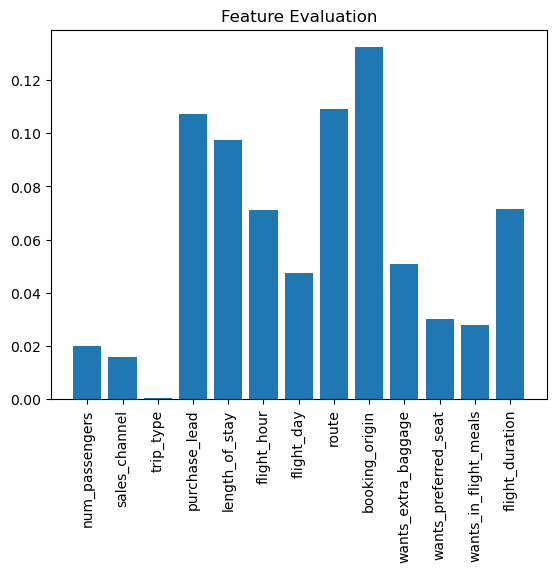

In [9]:
plt.title('Feature Evaluation')
plt.bar(df.columns[:-1].to_list(), feature_importance.importances_mean,label = 'permutation_importance')
plt.xticks(rotation = 90)
# plt.legend()
plt.show()